https://data.cityofnewyork.us/Public-Safety/NYPD-Complaint-Data-Historic/qgea-i56i

In [2]:
#!/usr/bin/env python

# make sure to install these packages before running:
# pip install pandas
# pip install sodapy

import pandas as pd
from sodapy import Socrata
import datetime


In [3]:
with open('token.txt') as f:
    token = f.readlines()
    token = token[0]

# Unauthenticated client only works with public data sets. Note 'None'
# in place of application token, and no username or password:
client = Socrata("data.cityofnewyork.us", app_token=token)  # the token is e0tJs1ImNvkUMP9CVWSkaTcd7, once we all copy into a token.txt file on our local repos we should be able to delete this comment and make the repo public

# Example authenticated client (needed for non-public datasets):
# client = Socrata(data.cityofnewyork.us,
#                  MyAppToken,
#                  userame="user@example.com",
#                  password="AFakePassword")

# First 2000 results, returned as JSON from API / converted to Python list of
# dictionaries by sodapy.
results = client.get("qgea-i56i",limit = 50000)

# Convert to pandas DataFrame
crimes = pd.DataFrame.from_records(results)

In [4]:
#crimes.describe()  # Takes a long time to run

In [5]:
crimes

,cmplnt_num,cmplnt_fr_dt,cmplnt_fr_tm,addr_pct_cd,rpt_dt,ky_cd,ofns_desc,pd_cd,pd_desc,crm_atpt_cptd_cd,...,cmplnt_to_tm,loc_of_occur_desc,susp_age_group,susp_race,susp_sex,parks_nm,housing_psa,hadevelopt,transit_district,station_name
0,394506329,2019-12-31T00:00:00.000,17:30:00,32,2019-12-31T00:00:00.000,118,DANGEROUS WEAPONS,793.0,WEAPONS POSSESSION 3,COMPLETED,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,968873685,2019-12-29T00:00:00.000,16:31:00,47,2019-12-29T00:00:00.000,113,FORGERY,729.0,"FORGERY,ETC.,UNCLASSIFIED-FELO",COMPLETED,...,16:54:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,509837549,2019-12-15T00:00:00.000,18:45:00,109,2019-12-29T00:00:00.000,578,HARRASSMENT 2,638.0,"HARASSMENT,SUBD 3,4,5",COMPLETED,...,NaN,FRONT OF,25-44,UNKNOWN,M,NaN,NaN,NaN,NaN,NaN
3,352454313,2019-12-28T00:00:00.000,01:00:00,47,2019-12-28T00:00:00.000,126,MISCELLANEOUS PENAL LAW,117.0,RECKLESS ENDANGERMENT 1,COMPLETED,...,NaN,REAR OF,18-24,BLACK,M,NaN,NaN,NaN,NaN,NaN
4,248803469,2008-09-05T00:00:00.000,21:41:00,NaN,2008-09-05T00:00:00.000,101,MURDER & NON-NEGL. MANSLAUGHTER,NaN,NaN,COMPLETED,...,NaN,OUTSIDE,NaN,NaN,NaN,NA,NA,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,111515035,2019-11-12T00:00:00.000,14:10:00,46,2019-11-12T00:00:00.000,344,ASSAULT 3 & RELATED OFFENSES,101.0,ASSAULT 3,COMPLETED,...,14:10:00,NaN,25-44,BLACK,U,NaN,NaN,NaN,NaN,NaN
49996,307131413,2019-11-14T00:00:00.000,19:30:00,103,2019-11-14T00:00:00.000,352,CRIMINAL TRESPASS,205.0,"TRESPASS 2, CRIMINAL",COMPLETED,...,21:24:00,INSIDE,45-64,BLACK,M,NaN,NaN,NaN,NaN,NaN
49997,796473554,2019-11-12T00:00:00.000,16:00:00,40,2019-11-12T00:00:00.000,578,HARRASSMENT 2,638.0,"HARASSMENT,SUBD 3,4,5",COMPLETED,...,16:30:00,INSIDE,UNKNOWN,UNKNOWN,U,NaN,NaN,NaN,NaN,NaN
49998,472354362,2019-11-16T00:00:00.000,04:55:00,19,2019-11-16T00:00:00.000,107,BURGLARY,213.0,"BURGLARY,COMMERCIAL,NIGHT",COMPLETED,...,05:02:00,INSIDE,45-64,WHITE HISPANIC,M,NaN,NaN,NaN,NaN,NaN


In [6]:
#Drop columns we won't be using
crimes.columns

Index(['cmplnt_num', 'cmplnt_fr_dt', 'cmplnt_fr_tm', 'addr_pct_cd', 'rpt_dt',
       'ky_cd', 'ofns_desc', 'pd_cd', 'pd_desc', 'crm_atpt_cptd_cd',
       'law_cat_cd', 'boro_nm', 'prem_typ_desc', 'juris_desc',
       'jurisdiction_code', 'x_coord_cd', 'y_coord_cd', 'latitude',
       'longitude', 'lat_lon', 'patrol_boro', 'vic_age_group', 'vic_race',
       'vic_sex', ':@computed_region_efsh_h5xi', ':@computed_region_f5dn_yrer',
       ':@computed_region_yeji_bk3q', ':@computed_region_92fq_4b7q',
       ':@computed_region_sbqj_enih', 'cmplnt_to_dt', 'cmplnt_to_tm',
       'loc_of_occur_desc', 'susp_age_group', 'susp_race', 'susp_sex',
       'parks_nm', 'housing_psa', 'hadevelopt', 'transit_district',
       'station_name'],
      dtype='object')

In [7]:
len(crimes.columns)

40

In [8]:
crimes[['cmplnt_fr_dt','cmplnt_fr_tm','cmplnt_fr_dt','loc_of_occur_desc','juris_desc','jurisdiction_code']]

,cmplnt_fr_dt,cmplnt_fr_tm,cmplnt_fr_dt,loc_of_occur_desc,juris_desc,jurisdiction_code
0,2019-12-31T00:00:00.000,17:30:00,2019-12-31T00:00:00.000,NaN,N.Y. POLICE DEPT,0.0
1,2019-12-29T00:00:00.000,16:31:00,2019-12-29T00:00:00.000,NaN,N.Y. POLICE DEPT,0.0
2,2019-12-15T00:00:00.000,18:45:00,2019-12-15T00:00:00.000,FRONT OF,N.Y. POLICE DEPT,0.0
3,2019-12-28T00:00:00.000,01:00:00,2019-12-28T00:00:00.000,REAR OF,N.Y. POLICE DEPT,0.0
4,2008-09-05T00:00:00.000,21:41:00,2008-09-05T00:00:00.000,OUTSIDE,N.Y. POLICE DEPT,NaN
...,...,...,...,...,...,...
49995,2019-11-12T00:00:00.000,14:10:00,2019-11-12T00:00:00.000,NaN,N.Y. POLICE DEPT,0.0
49996,2019-11-14T00:00:00.000,19:30:00,2019-11-14T00:00:00.000,INSIDE,N.Y. POLICE DEPT,0.0
49997,2019-11-12T00:00:00.000,16:00:00,2019-11-12T00:00:00.000,INSIDE,N.Y. POLICE DEPT,0.0
49998,2019-11-16T00:00:00.000,04:55:00,2019-11-16T00:00:00.000,INSIDE,N.Y. POLICE DEPT,0.0


In [9]:
crimes.drop(['ky_cd','ofns_desc','pd_cd', 'pd_desc','loc_of_occur_desc','jurisdiction_code','parks_nm','housing_psa',
            'transit_district','station_name',':@computed_region_efsh_h5xi',':@computed_region_f5dn_yrer',':@computed_region_yeji_bk3q',
           ':@computed_region_92fq_4b7q',':@computed_region_sbqj_enih','lat_lon','x_coord_cd','y_coord_cd','cmplnt_num','patrol_boro'], axis = 1, inplace = True)
#ky_cd-Three digit offense classification code
#ofns_descO-Description of offense corresponding with key code
#pd_cd-Three digit internal classification code
#pd_desc - Description of internal classification corresponding with PD code
#loc_of_occur_desc -Specific location of occurrence in or around the premises; inside, opposite of, front of, rear of-getting rid of this one becuase we have a more useful description
#jurisdiction_code- code of juisdiction found in Juris_desc which had better description and no blank values
#lat_long- lattitude and longitude - have redundant information in other columns
#'x_coord_cd'- have redundant information in other columns
#'y_coord_cd'- have redundant information in other columns
# cmplnt_num - don't need this as the values are indexed
# patrol_boro- same info as boro_nm just broken down a little more, however to keep a better model wanting to do just one

#------too many NAs becuase not all reports happen in pertaining areas------------------
#parks_nm - park number 
#housing_psa - Development Level Code
#transit_district - Transit district in which the offense occurred.
#station_name -Transit station name


#----- random columns that were added---------------------
# :@computed_region_efsh_h5xi      
# :@computed_region_f5dn_yrer       
# :@computed_region_yeji_bk3q       
# :@computed_region_92fq_4b7q       
# :@computed_region_sbqj_enih







In [10]:
crimes.isna().sum()

cmplnt_fr_dt            0
cmplnt_fr_tm            0
addr_pct_cd             8
rpt_dt                  0
crm_atpt_cptd_cd        0
law_cat_cd              0
boro_nm               111
prem_typ_desc         288
juris_desc              0
latitude               18
longitude              18
vic_age_group          15
vic_race                0
vic_sex                 0
cmplnt_to_dt         6139
cmplnt_to_tm         6108
susp_age_group      12057
susp_race           12052
susp_sex            12053
hadevelopt          47740
dtype: int64

|Variable|Description|
|:-|:-|
|cmplnt_fr_dt|Exact date of occurrence for the reported event|
|cmplnt_fr_tm| Exact time of occurrence for the reported event|
|addr_pct_cd |  The precinct in which the incident occurred |          
|rpt_dt      |  Date event was reported to police |          
|crm_atpt_cptd_cd|Indicator of whether crime was successfully completed or attempted, but failed or was interrupted prematurely |
|law_cat_cd    |     Level of offense: felony, misdemeanor, violation|     
|boro_nm        |       The name of the borough in which the incident occurred|
|prem_typ_desc   |      Specific description of premises; grocery store, residence, street, etc.|
|juris_desc       |       Description of the jurisdiction code|
|latitude    |Midblock Latitude coordinate for Global Coordinate System, WGS 1984, decimal degrees (EPSG 4326)| 
|longitude   |Midblock Longitude coordinate for Global Coordinate System, WGS 1984, decimal degrees (EPSG 4326)
|vic_age_group       |  Victim’s Age Group| 
|vic_race             |   Victim’s Race Description|
|vic_sex        |Victim’s Sex Description (D=Business/Organization, E=PSNY/People of the State of New York, F=Female, M=Male)|
|cmplnt_to_dt    |  Ending date of occurrence for the reported event, if exact time of occurrence is unknown|  
|cmplnt_to_tm     |   Ending time of occurrence for the reported event, if exact time of occurrence is unknown |
|susp_age_group    |  Suspect’s Age Group |
|susp_race          | Suspect’s Race Description|
|susp_sex            | Suspect’s Sex Description |
|hadevelopt        |Name of NYCHA housing development of occurrence, if applicable|


There are a few date columns, How do we want to break them up? Do we want to even include them?
Ideas:

    rpt_date- change just to month crime was reported
    Duration of complaint- cmplnt_fr_date-cmplnt_to_dt
    time of day of complaint- use either cmplt_fm_tm (id use this one probably) or cmplnt_to_tm?
    

In [11]:
crimes[['cmplnt_fr_dt','cmplnt_fr_tm','cmplnt_to_dt','cmplnt_to_tm']]

,cmplnt_fr_dt,cmplnt_fr_tm,cmplnt_to_dt,cmplnt_to_tm
0,2019-12-31T00:00:00.000,17:30:00,NaN,NaN
1,2019-12-29T00:00:00.000,16:31:00,2019-12-29T00:00:00.000,16:54:00
2,2019-12-15T00:00:00.000,18:45:00,NaN,NaN
3,2019-12-28T00:00:00.000,01:00:00,NaN,NaN
4,2008-09-05T00:00:00.000,21:41:00,NaN,NaN
...,...,...,...,...
49995,2019-11-12T00:00:00.000,14:10:00,2019-11-12T00:00:00.000,14:10:00
49996,2019-11-14T00:00:00.000,19:30:00,2019-11-14T00:00:00.000,21:24:00
49997,2019-11-12T00:00:00.000,16:00:00,2019-11-12T00:00:00.000,16:30:00
49998,2019-11-16T00:00:00.000,04:55:00,2019-11-16T00:00:00.000,05:02:00


In [12]:
crimes[['cmplnt_fr_dt','cmplnt_fr_tm','cmplnt_to_dt','cmplnt_to_tm']].isna().sum()

cmplnt_fr_dt       0
cmplnt_fr_tm       0
cmplnt_to_dt    6139
cmplnt_to_tm    6108
dtype: int64

i think using 'cmplnt_fr_dt','cmplnt_fr_tm' more than the other ones might be good becuase there aren't missing values

In [13]:
crimes.drop(['rpt_dt', 'cmplnt_to_dt', 'cmplnt_to_tm'], axis = 1, inplace = True)

In [14]:
# Make development column a true (1) or false(0)
crimes['hadevelopt'] = crimes['hadevelopt'].fillna(0)
for i in range(0,50000):
    if crimes['hadevelopt'][i] != 0:
        crimes['hadevelopt'][i] = 1

In [15]:
# change date column to month numbers to help with time of year
# we can change this to quarter of the year if that makes it easier
crimes['cmplnt_fr_dt'] = crimes.cmplnt_fr_dt.replace({'T00:00:00.000':''}, regex=True)
for x in range(0,50000):
    temp = crimes['cmplnt_fr_dt'][x]
    temp = temp.split('-')[1]
    crimes['cmplnt_fr_dt'][x] = temp

In [16]:
# break up the time into groups
# morning: 5 AM - Noon = 1
# afternoon: Noon - 6 PM = 2
# evening: 6 PM - 10 PM = 3
# night: 10 PM - 5 AM = 4
for z in range(0,50000):
    time = crimes['cmplnt_fr_tm'][z]
    time = int(time.split(':')[0])
    if 5 <= time < 12:
        crimes['cmplnt_fr_tm'][z] = 1
    elif 12 <= time < 18:
        crimes['cmplnt_fr_tm'][z] = 2
    elif 18 <= time < 22:
        crimes['cmplnt_fr_tm'][z] = 3
    else:
        crimes['cmplnt_fr_tm'][z] = 4

In [17]:
crimes

,cmplnt_fr_dt,cmplnt_fr_tm,addr_pct_cd,crm_atpt_cptd_cd,law_cat_cd,boro_nm,prem_typ_desc,juris_desc,latitude,longitude,vic_age_group,vic_race,vic_sex,susp_age_group,susp_race,susp_sex,hadevelopt
0,12,2,32,COMPLETED,FELONY,MANHATTAN,STREET,N.Y. POLICE DEPT,40.82092679700002,-73.94332421899996,UNKNOWN,UNKNOWN,E,NaN,NaN,NaN,0
1,12,2,47,COMPLETED,FELONY,BRONX,STREET,N.Y. POLICE DEPT,40.885701406000074,-73.86164032499995,UNKNOWN,UNKNOWN,E,NaN,NaN,NaN,0
2,12,3,109,COMPLETED,VIOLATION,QUEENS,STREET,N.Y. POLICE DEPT,40.74228115600005,-73.81982408,25-44,WHITE HISPANIC,F,25-44,UNKNOWN,M,0
3,12,4,47,COMPLETED,FELONY,BRONX,STREET,N.Y. POLICE DEPT,40.87531145100007,-73.84754521099995,UNKNOWN,UNKNOWN,E,18-24,BLACK,M,0
4,09,3,NaN,COMPLETED,FELONY,NaN,NaN,N.Y. POLICE DEPT,40.698827283,-73.938819047,25-44,BLACK,M,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,11,2,46,COMPLETED,MISDEMEANOR,BRONX,STREET,N.Y. POLICE DEPT,40.859024314000074,-73.90019280199994,25-44,WHITE HISPANIC,M,25-44,BLACK,U,0
49996,11,3,103,COMPLETED,MISDEMEANOR,QUEENS,COMMERCIAL BUILDING,N.Y. POLICE DEPT,40.701628030000045,-73.77583305199995,UNKNOWN,UNKNOWN,D,45-64,BLACK,M,0
49997,11,2,40,COMPLETED,VIOLATION,BRONX,HOSPITAL,N.Y. POLICE DEPT,40.81770982900008,-73.92397301399996,45-64,WHITE HISPANIC,F,UNKNOWN,UNKNOWN,U,0
49998,11,4,19,COMPLETED,FELONY,MANHATTAN,CHECK CASHING BUSINESS,N.Y. POLICE DEPT,40.77984309400005,-73.95429262099998,UNKNOWN,UNKNOWN,D,45-64,WHITE HISPANIC,M,0


In [18]:
# rename columns to something we can easily remember
crimes.columns = ['month', 'time_of_day', 'precinct', 'crime_completed', 'offense_level', 'borough_name', 'premises',
                  'jurisdiction_code', 'latitude', 'longitude', 'victim_age_group', 'victim_race', 'victim_sex',
                  'suspect_age_group', 'suspect_race', 'suspect_sex', 'city_housing']

In [19]:
crimes

,month,time_of_day,precinct,crime_completed,offense_level,borough_name,premises,jurisdiction_code,latitude,longitude,victim_age_group,victim_race,victim_sex,suspect_age_group,suspect_race,suspect_sex,city_housing
0,12,2,32,COMPLETED,FELONY,MANHATTAN,STREET,N.Y. POLICE DEPT,40.82092679700002,-73.94332421899996,UNKNOWN,UNKNOWN,E,NaN,NaN,NaN,0
1,12,2,47,COMPLETED,FELONY,BRONX,STREET,N.Y. POLICE DEPT,40.885701406000074,-73.86164032499995,UNKNOWN,UNKNOWN,E,NaN,NaN,NaN,0
2,12,3,109,COMPLETED,VIOLATION,QUEENS,STREET,N.Y. POLICE DEPT,40.74228115600005,-73.81982408,25-44,WHITE HISPANIC,F,25-44,UNKNOWN,M,0
3,12,4,47,COMPLETED,FELONY,BRONX,STREET,N.Y. POLICE DEPT,40.87531145100007,-73.84754521099995,UNKNOWN,UNKNOWN,E,18-24,BLACK,M,0
4,09,3,NaN,COMPLETED,FELONY,NaN,NaN,N.Y. POLICE DEPT,40.698827283,-73.938819047,25-44,BLACK,M,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,11,2,46,COMPLETED,MISDEMEANOR,BRONX,STREET,N.Y. POLICE DEPT,40.859024314000074,-73.90019280199994,25-44,WHITE HISPANIC,M,25-44,BLACK,U,0
49996,11,3,103,COMPLETED,MISDEMEANOR,QUEENS,COMMERCIAL BUILDING,N.Y. POLICE DEPT,40.701628030000045,-73.77583305199995,UNKNOWN,UNKNOWN,D,45-64,BLACK,M,0
49997,11,2,40,COMPLETED,VIOLATION,BRONX,HOSPITAL,N.Y. POLICE DEPT,40.81770982900008,-73.92397301399996,45-64,WHITE HISPANIC,F,UNKNOWN,UNKNOWN,U,0
49998,11,4,19,COMPLETED,FELONY,MANHATTAN,CHECK CASHING BUSINESS,N.Y. POLICE DEPT,40.77984309400005,-73.95429262099998,UNKNOWN,UNKNOWN,D,45-64,WHITE HISPANIC,M,0


In [20]:
crimes.to_csv("clean_crime.csv")

## Modeling

In [41]:
import numpy as np

from sklearn.base import TransformerMixin
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

In [42]:
crimes = pd.read_csv('clean_crime.csv')

In [43]:
# these variables are numbers in the csv, but they are actually categorical data, so we cast them to strings

crimes['month'] = crimes['month'].astype(str)
crimes['time_of_day'] = crimes['time_of_day'].astype(str)
crimes['precinct'] = crimes['precinct'].astype(str)
crimes['city_housing'] = crimes['city_housing'].astype(str)

Next we will impute missing values, using averages for numeric data and the most common value for categorical data.

In [44]:
class DataFrameImputer(TransformerMixin):

    def __init__(self):
        """Impute missing values.

        Columns of dtype object are imputed with the most frequent value 
        in column.

        Columns of other types are imputed with mean of column.

        """
    def fit(self, X, y=None):

        self.fill = pd.Series([X[c].value_counts().index[0]
            if X[c].dtype == np.dtype('O') else X[c].mean() for c in X],
            index=X.columns)

        return self

    def transform(self, X, y=None):
        return X.fillna(self.fill)

crimes = DataFrameImputer().fit_transform(crimes)

In [45]:
# removing the target for our X set

X = crimes[['month', 'time_of_day', 'precinct', 'crime_completed', 'borough_name', 'premises',
                  'jurisdiction_code', 'latitude', 'longitude', 'victim_age_group', 'victim_race', 'victim_sex',
                  'suspect_age_group', 'suspect_race', 'suspect_sex', 'city_housing']]

In [46]:
# we need to get dummy variables, but only for the categorical variables, then we recombine

categorical_feature_mask = X.dtypes==object
numerical_features_mask = X.dtypes!=object
categorical_cols = X.columns[categorical_feature_mask].tolist()
numerical_cols = X.columns[numerical_features_mask].tolist()
X_cat = X[categorical_cols]
X_cat = pd.get_dummies(X_cat)
X = X_cat.join(X[numerical_cols])

In [47]:
# y is our target: 'offense_level'

y = crimes['offense_level']

In [48]:
y.value_counts() 

MISDEMEANOR    26395
FELONY         15634
VIOLATION       7971
Name: offense_level, dtype: int64

Looks like our classes are not equally distributed, if our model isn't performing well we might consider adding weight to violations.

Time to make some models!

Bagging:

In [65]:
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn import metrics
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import mean_squared_error, r2_score

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=426, stratify=y, test_size=.2)

In [67]:
bag = BaggingClassifier(n_estimators=100, n_jobs=-1)
bag.fit(X_train,y_train)
bag_pred = bag.predict(X_test)

bagging_accuracy = metrics.accuracy_score(y_test, bag_pred)

In [68]:
print(metrics.confusion_matrix(y_test, bag_pred))
print(metrics.classification_report(y_test, bag_pred))

[[1195 1744  188]
 [ 975 3947  357]
 [ 207  956  431]]
              precision    recall  f1-score   support

      FELONY       0.50      0.38      0.43      3127
 MISDEMEANOR       0.59      0.75      0.66      5279
   VIOLATION       0.44      0.27      0.34      1594

    accuracy                           0.56     10000
   macro avg       0.51      0.47      0.48     10000
weighted avg       0.54      0.56      0.54     10000



Random Forest:

In [69]:
rf = RandomForestClassifier(n_estimators=100, n_jobs=-1, max_depth=3)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

rf_accuracy = metrics.accuracy_score(y_test, rf_pred)

In [70]:
print(metrics.confusion_matrix(y_test, rf_pred))
print(metrics.classification_report(y_test, rf_pred))

[[  93 3034    0]
 [  22 5257    0]
 [   0 1594    0]]
              precision    recall  f1-score   support

      FELONY       0.81      0.03      0.06      3127
 MISDEMEANOR       0.53      1.00      0.69      5279
   VIOLATION       0.00      0.00      0.00      1594

    accuracy                           0.54     10000
   macro avg       0.45      0.34      0.25     10000
weighted avg       0.53      0.54      0.38     10000



C:\Users\bentlia0\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\bentlia0\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\bentlia0\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


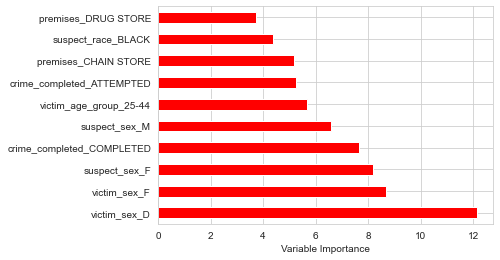

In [71]:
Importance = pd.DataFrame({'Importance':rf.feature_importances_*100}, index=X_train.columns)
Importance = Importance.iloc[rf.feature_importances_ > 0,:]
Importance = Importance.sort_values('Importance', axis=0, ascending=True)
Importance.sort_values('Importance', axis=0, ascending=False).head(10).plot(kind='barh', color='r', )
plt.xlabel('Variable Importance')
plt.gca().legend_ = None

By this, we note that 'victim_sex_D', meaning that the victim wasn't a person but in fact a business or organization, is the most important. We also note that victim and suspect gender, and to a lesser extent, race, were significant to the model. 

Gradient Boosting:

In [72]:
gb = GradientBoostingClassifier(n_estimators=100, learning_rate=.1)
gb.fit(X_train, y_train)
gb_pred = gb.predict(X_test)

gb_accuracy = metrics.accuracy_score(y_test, gb_pred)

In [73]:
print(metrics.confusion_matrix(y_test, gb_pred))
print(metrics.classification_report(y_test, gb_pred))

[[ 449 2592   86]
 [ 232 4886  161]
 [  41 1290  263]]
              precision    recall  f1-score   support

      FELONY       0.62      0.14      0.23      3127
 MISDEMEANOR       0.56      0.93      0.70      5279
   VIOLATION       0.52      0.16      0.25      1594

    accuracy                           0.56     10000
   macro avg       0.56      0.41      0.39     10000
weighted avg       0.57      0.56      0.48     10000



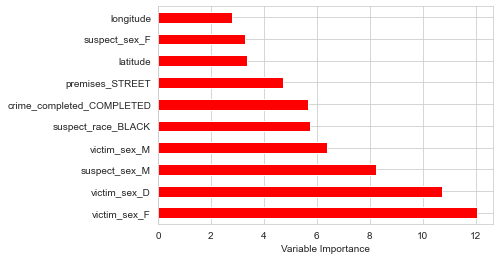

In [74]:
Importance = pd.DataFrame({'Importance':gb.feature_importances_*100}, index=X_train.columns)
Importance = Importance.iloc[gb.feature_importances_ > 0,:]
Importance = Importance.sort_values('Importance', axis=0, ascending=True)
Importance.sort_values('Importance', axis=0, ascending=False).head(10).plot(kind='barh', color='r', )
plt.xlabel('Variable Importance')
plt.gca().legend_ = None

Once again 'victim_sex_D' was pretty high up, but this time it is overtaken by 'victim_sex_F'. Most of the same variables are present, though in different orders. Interestingly, the gradient boosting model was able to make good use of the latitude and longitude variables, indicating that location is significant in classifying the severity of crimes.

In [78]:
# Comparisons

def accuracy_compare_models(models):
    return sorted(models.items(), key = lambda kv:(kv[1], kv[0]), reverse= True)

accuracy = {'Bagging': bagging_accuracy, 'Random Forest': rf_accuracy, 'Gradient Boosting': gb_accuracy} 
print('Best overall models by highest accuracy: ', accuracy_compare_models(accuracy), '\n')


Best overall models by highest accuracy:  [('Gradient Boosting', 0.5598), ('Bagging', 0.5573), ('Random Forest', 0.535)] 

